# Notebook for visualization of results
## Data loading

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Sklearn logistic regression
I used liblinear solver, because our dataset is small.

In [36]:
X.shape

(569, 30)

Sklern Linear Model: 0.9680851063829787


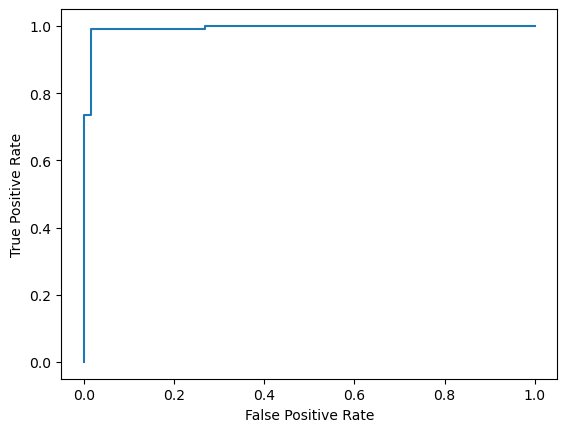

In [37]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, accuracy_score

logistic_regression = LogisticRegression(max_iter=100000, penalty='none')
logistic_regression.fit(X_train, y_train)
y_proba = logistic_regression.predict_proba(X_test)
y_pred = logistic_regression.predict(X_test)


def plot_roc_curve(y_true, y_proba, y_pred, name):
    fpr, tpr, threshold = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(f"{name}: {accuracy_score(y_true, y_pred)}")


plot_roc_curve(y_test, y_proba[:, 1], y_pred, "Sklern Linear Model")

## My logistic regression

My logistic regression: 0.6861702127659575


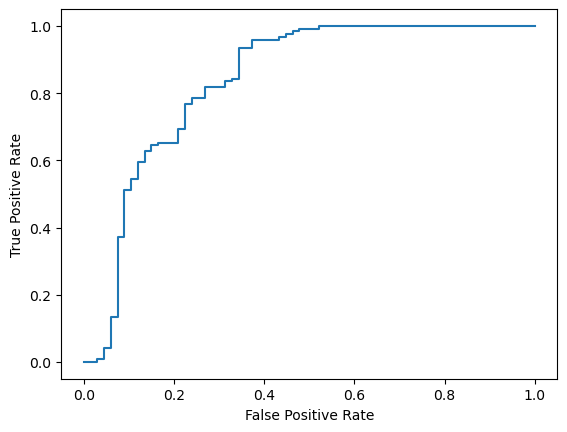

In [38]:
from irls.irls import LogisticRegression

my_logistic_regression = LogisticRegression(optimizer="GB", alpha=1e-4, max_num_iters=2000, reg_term=0, tol=1e-6)
my_logistic_regression.fit(X_train, y_train)
y_proba = my_logistic_regression.predict_proba(X_test)
y_pred = my_logistic_regression.predict(X_test)
plot_roc_curve(y_test, y_proba, y_pred, "My logistic regression")


My logistic regression: 0.9414893617021277


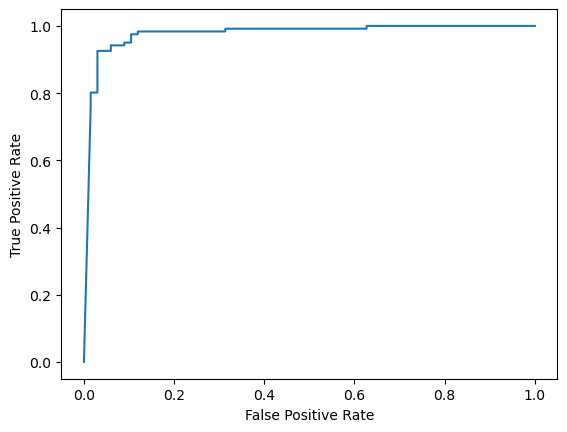

In [39]:
my_logistic_regression = LogisticRegression(optimizer="IRLS", max_num_iters=100)
my_logistic_regression.fit(X_train, y_train)
y_proba = my_logistic_regression.predict_proba(X_test)
y_pred = my_logistic_regression.predict(X_test)
plot_roc_curve(y_test, y_proba, y_pred, "My logistic regression")